In [ ]:
%matplotlib inline
%env CUDA_VISIBLE_DEVICES = 1

In [1]:
import sys

import numpy as np
import os
import blosc

import tensorflow as tf
import matplotlib.pyplot as plt

import os
import blosc

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm import tqdm
sys.path.append("..")

from dataset import DatasetIndex, Dataset
from dataset import Batch, action, model, inbatch_parallel
from ensemble_batch import MnistBatch
from ensemble_batch import draw_stats

In [2]:
src = 'C:/Users/Dari/Documents/az_training/task_03'

with open(os.path.join(src, 'mnist_pics.blk'), 'rb') as file:
    full_imgs = blosc.unpack_array(file.read())
    
with open(os.path.join(src, 'mnist_labels.blk'), 'rb') as file:
    full_labs = blosc.unpack_array(file.read())
    
src = (np.reshape(full_imgs, (65000, 28, 28)), full_labs)

LEN_MNIST = 65000
indy = DatasetIndex(np.arange(LEN_MNIST))

mnistset = Dataset(indy, batch_class=MnistBatch)
mnistset.cv_split([0.9, 0.1])

env: CUDA_VISIBLE_DEVICES=1


In [35]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
stats = []
loss_history = []
train_stats = []
train_loss_history = []

In [36]:
alpha = 0.1
period = 250
n_iterations = 1251

In [37]:
# pipeline for train
ppl = (mnistset.train.pipeline().
       load(src=src, fmt='ndarray').
       train_convy(sess,  alpha, period, n_iterations, train_stats, train_loss_history))

# pipeline for test
ppl_test = (mnistset.test.pipeline().
            load(src=src, fmt='ndarray').
            update_stats(sess, stats, loss_history))

In [38]:
for i in tqdm(range(n_iterations)):
    ppl.next_batch(100, n_epochs=None)
    ppl_test.next_batch(100, n_epochs=None)

 20%|███████████████▊                                                               | 250/1251 [03:54<18:05,  1.08s/it]

hey


 40%|███████████████████████████████▌                                               | 500/1251 [08:41<14:49,  1.18s/it]

hey


 60%|███████████████████████████████████████████████▎                               | 750/1251 [14:12<10:37,  1.27s/it]

hey


 80%|██████████████████████████████████████████████████████████████▎               | 1000/1251 [20:28<05:59,  1.43s/it]

hey


100%|█████████████████████████████████████████████████████████████████████████████▉| 1250/1251 [27:00<00:01,  1.53s/it]

hey


100%|██████████████████████████████████████████████████████████████████████████████| 1251/1251 [27:29<00:00,  9.78s/it]


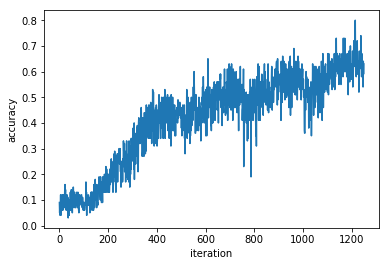

In [41]:
draw_stats(stats, '')

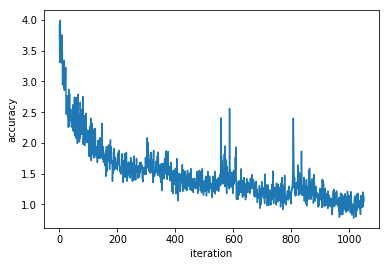

In [48]:
draw_stats(loss_history[200:], '')

In [49]:
ensemble_stats = []
ensemble_loss_history = []

# pipeline for ensemble test
ppl_ens_test = (mnistset.test.pipeline().
            load(src=src, fmt='ndarray').
            update_stats_ensemble(ensemble_stats, ensemble_loss_history))

In [50]:
for i in tqdm(range(250)):
    ppl_ens_test.next_batch(100, n_epochs=None)

  0%|                                                                                          | 0/250 [00:00<?, ?it/s]

i do hardcoding of n_iterations and period
currently loading trained+250/model-250.meta
INFO:tensorflow:Restoring parameters from trained+250/model-250
currently loading trained+500/model-500.meta
INFO:tensorflow:Restoring parameters from trained+500/model-500
currently loading trained+750/model-750.meta
INFO:tensorflow:Restoring parameters from trained+750/model-750
currently loading trained+1000/model-1000.meta
INFO:tensorflow:Restoring parameters from trained+1000/model-1000
currently loading trained+1250/model-1250.meta
INFO:tensorflow:Restoring parameters from trained+1250/model-1250


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [05:14<00:00,  5.30it/s]


In [5]:
ensemble_stats[0]

0.94142854

In [67]:
stats[1230:]

[0.51999998,
 0.58999997,
 0.68000001,
 0.61000001,
 0.63,
 0.63999999,
 0.62,
 0.62,
 0.74000001,
 0.67000002,
 0.63,
 0.57999998,
 0.67000002,
 0.63,
 0.58999997,
 0.63999999,
 0.63999999,
 0.54000002,
 0.63999999,
 0.58999997,
 0.63]

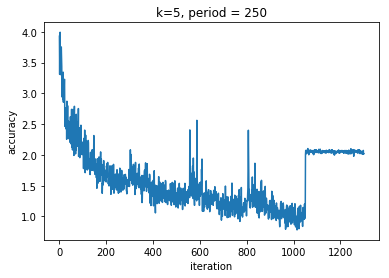

In [52]:
draw_stats(loss_history[200:] + ensemble_loss_history, 'k=5, period = 250')

In [68]:
ensemble_loss_history[-2:]

[2.012171, 2.0211027]

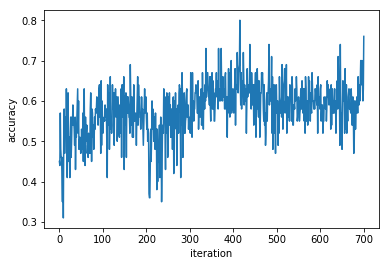

In [56]:
draw_stats(stats[800:] + ensemble_stats, '')

In [59]:
np.mean(ensemble_stats)

0.59820002

In [58]:
np.mean(stats[1000:])

0.58494025

In [29]:
stats[-2]

0.95999998